# Algorítmos de Clustering


Ilustra o funcionamento do algoritmo K-Means.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Cristiano Carvalho

-------------------------------------------------------------------------------

### Referência do exemplo

 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py



### Carga dos dados (Dados sintéticos e aleatórios)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans #dbscan
from sklearn.datasets import make_blobs


# Criando amostras de exemplo
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=170) #clusters de exemplo

In [ ]:
y

array([1, 1, 0, ..., 2, 2, 2])

In [ ]:
X

array([[-5.19811282e+00,  6.41869316e-01],
       [-5.75229538e+00,  4.18627111e-01],
       [-1.08448984e+01, -7.55352273e+00],
       ...,
       [ 1.36105255e+00, -9.07491863e-01],
       [-3.54141108e-01,  7.12241630e-01],
       [ 1.88577252e+00,  1.41185693e-03]])

Text(0.5, 1.0, 'Plot')

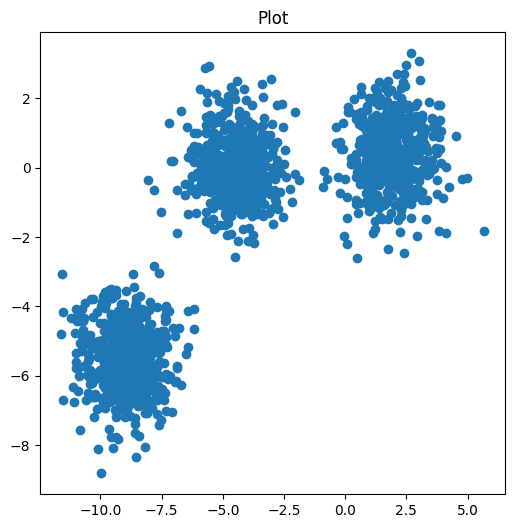

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Plot")

In [ ]:
# Two clusters
y_pred = KMeans(n_clusters=2, max_iter=300, n_init="auto", random_state=170).fit_predict(X)

y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Numero incorreto de clusters')

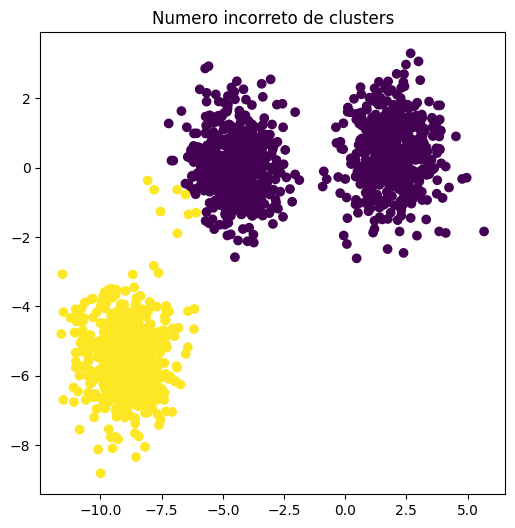

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Numero incorreto de clusters")

Aproveite para explorar!

Excelente exemplo para visualizar outros tipos de clusterings que melhor se adequam a diferentes distribuições de dados: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

Como encontrar o melhor número de clusterings automaticamente? Elbow Method

Text(0.5, 1.0, 'Incorrect Number of Blobs')

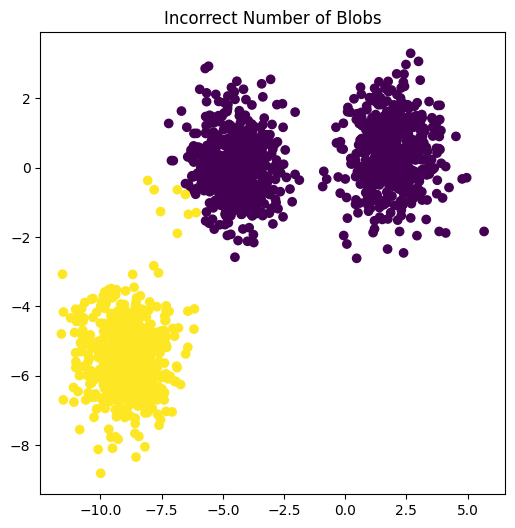

In [ ]:
X, y = make_blobs(n_samples=n_samples, random_state=170)

y_pred = KMeans(n_clusters=2, n_init="auto", random_state=170).fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [ ]:
[i for i in range(1,6)]

[1, 2, 3, 4, 5]

In [ ]:
# inertia_: Soma das distancias ao quadrado das amostras ao centro do cluster.
# Quanto menor, mais proximos os pontos entre si dentro de um grupo e melhor divididos são os agrupamentos
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

values = []
for k in range(1,6):
  km = KMeans(n_clusters=k, n_init="auto", random_state=170)
  km.fit_predict(X)
  print("N Grupos:", k, "Qualidade (distancia média):", round(km.inertia_))
  values.append(km.inertia_)

N Grupos: 1 Qualidade (distancia média): 43533
N Grupos: 2 Qualidade (distancia média): 13264
N Grupos: 3 Qualidade (distancia média): 2863
N Grupos: 4 Qualidade (distancia média): 2551
N Grupos: 5 Qualidade (distancia média): 2251


A partir de quantos clusterings as distâncias diminuem de maneira muito mais suave?

In [ ]:
# ELBOW

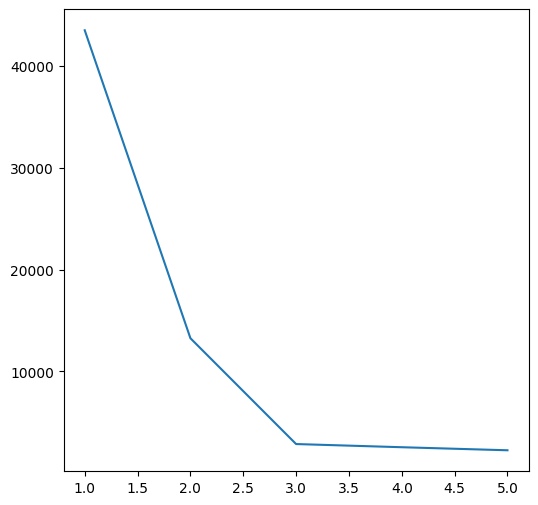

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(range(1,6), values);

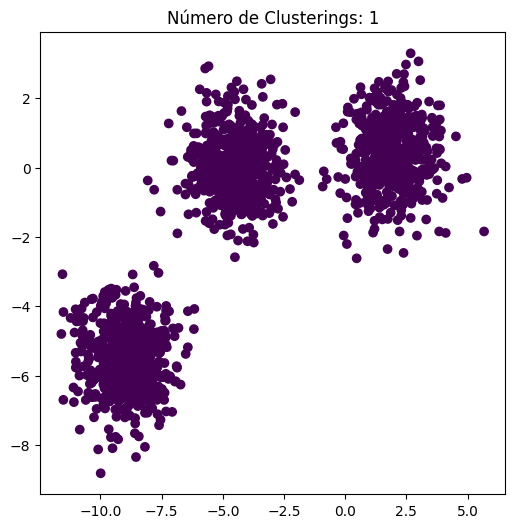

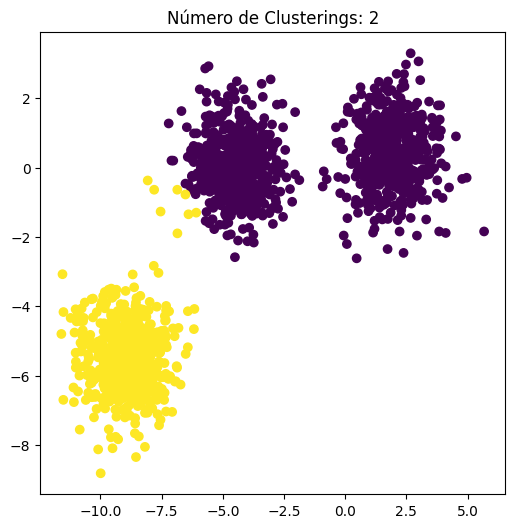

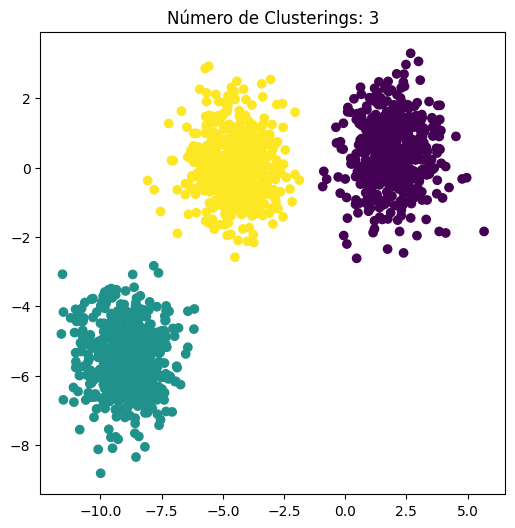

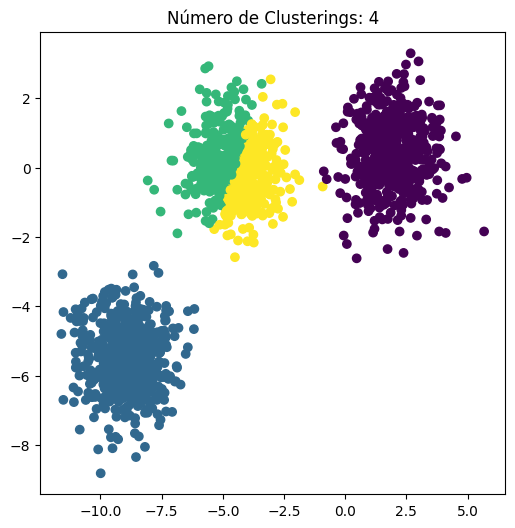

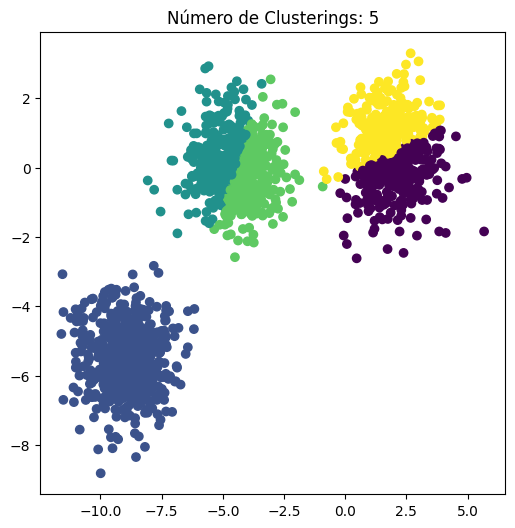

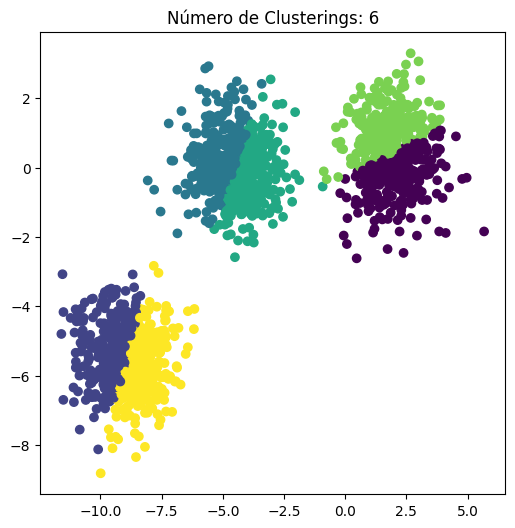

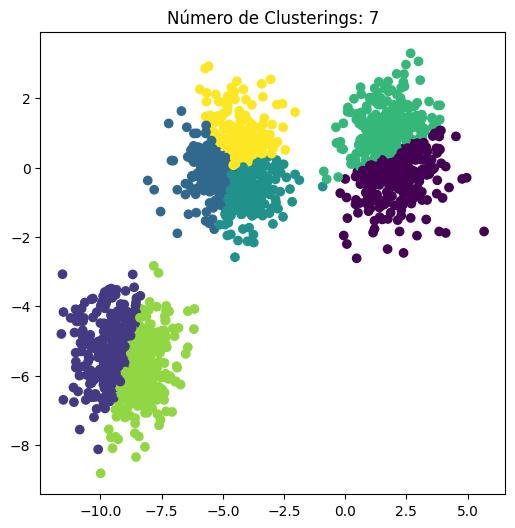

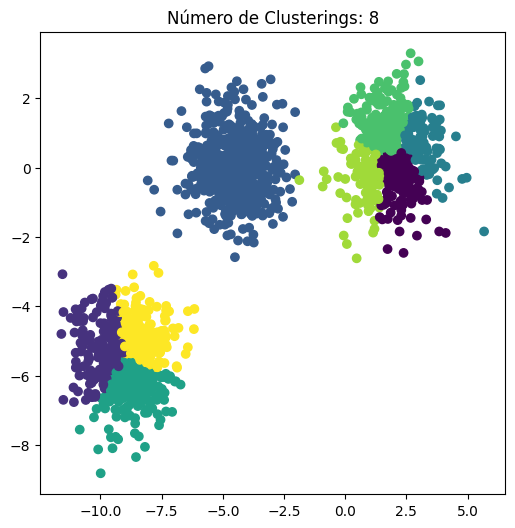

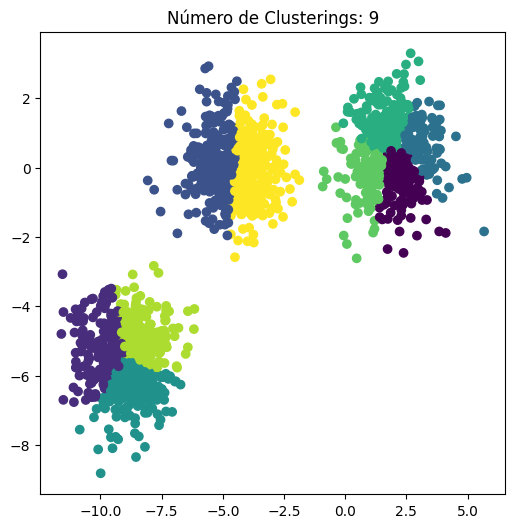

In [ ]:
values = []
for k in range(1,10):

  km = KMeans(n_clusters=k, n_init="auto", random_state=170)
  y_pred = km.fit_predict(X)
  plt.figure(figsize=(6, 6))
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("Número de Clusterings: "+str(k))

In [ ]:
# Deem uma brincada com clustering hierarquico (com código python)

# https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/

# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

###Extra: Exemplos de dificuldades do Kmeans

In [ ]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation) # iso vs aniso https://geokrigagem.com.br/wp-content/uploads/2018/06/24-1-1.png



Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

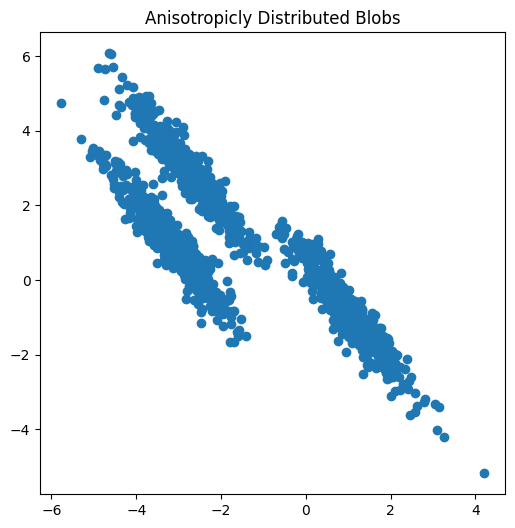

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title("Anisotropicly Distributed Blobs")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

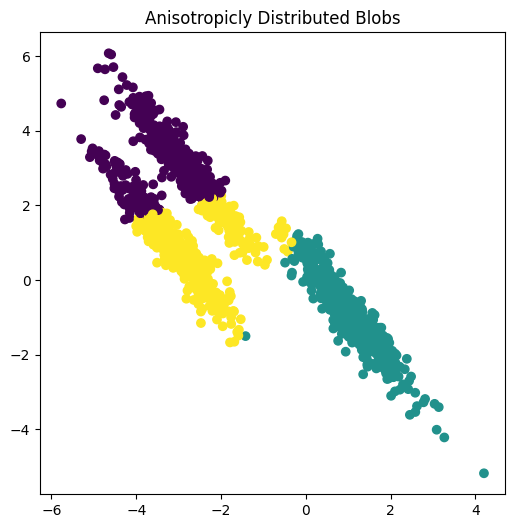

In [ ]:
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_aniso)

plt.figure(figsize=(6, 6))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

Text(0.5, 1.0, 'Unequal Variance')

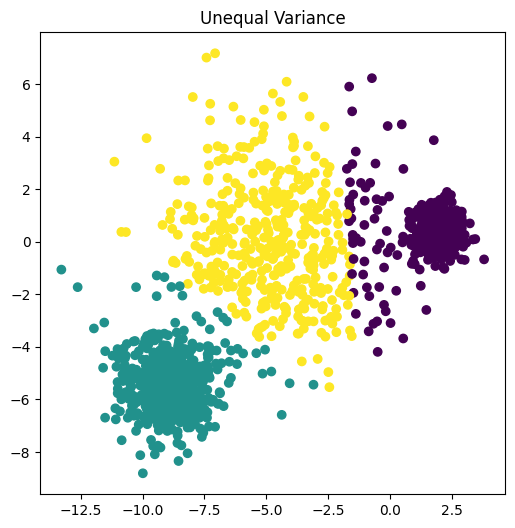

In [ ]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

y_pred = KMeans(n_clusters=3, n_init="auto", random_state=170).fit_predict(X_varied)

plt.figure(figsize=(6, 6))
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

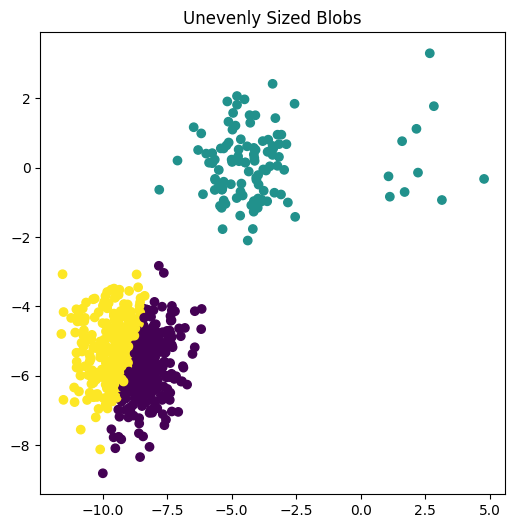

In [ ]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))


y_pred = KMeans(n_clusters=3, n_init="auto",
                random_state=170).fit_predict(X_filtered)

plt.figure(figsize=(6, 6))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()